In [1]:
!nvidia-smi

Wed Dec 13 03:05:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Clone repo

In [2]:
!git clone https://github.com/hieuoneplus/computer-vision.git main
%cd main

Cloning into 'main'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (329/329), done.
remote: Total 363 (delta 15), reused 363 (delta 15), pack-reused 0
Receiving objects: 100% (363/363), 21.00 MiB | 17.32 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/main


# Install dependencies

In [3]:
# %%capture
%cd /content/main/
!pip install -r requirements.txt

/content/main
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 454.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.

# Download pretrained weights

In [6]:
%cd /content/main
!mkdir "/content/main/weights"

from tool.utils import download_pretrained_weights
download_pretrained_weights("pan_resnet18_sroie19", cached="/content/main/weights/PANNet_best_map.pth")
download_pretrained_weights("transformerocr_mcocr", cached="/content/main/weights/transformerocr.pth")

/content/main
mkdir: cannot create directory ‘/content/main/weights’: File exists


Cached Downloading: /content/main/weights/PANNet_best_map.pth
Downloading...
From: https://drive.google.com/uc?id=1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W
To: /root/.cache/gdown/tmpxbplsqob/dl
100%|██████████| 138M/138M [00:01<00:00, 108MB/s]
Cached Downloading: /content/main/weights/transformerocr.pth
Downloading...
From: https://drive.google.com/uc?id=1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot
To: /root/.cache/gdown/tmpeco7i0sw/dl
100%|██████████| 152M/152M [00:01<00:00, 116MB/s]


'/content/main/weights/transformerocr.pth'

# Inference

## Inference modules on Personal ID

In [10]:
%cd /content/main
import os
import cv2
import pandas as pd
from modules import Detection, OCR, Correction
from tool.utils import natural_keys, visualize
import rotate
import time
import matplotlib.pyplot as plt

/content/main


In [21]:
# Define some variables
img_id = "3"

det_weight = "weights/PANNet_best_map.pth"
ocr_weight = "weights/transformerocr.pth"

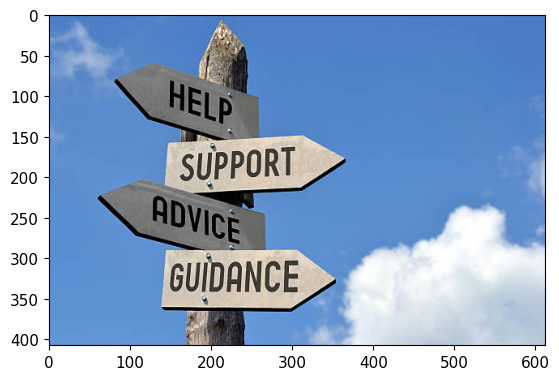

In [22]:
# Read image
img = cv2.imread(f"/content/{img_id}.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [11]:
# Initialize modules

det_model = Detection(weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)

correction = Correction()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 220MB/s]


load pretrained models from imagenet


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


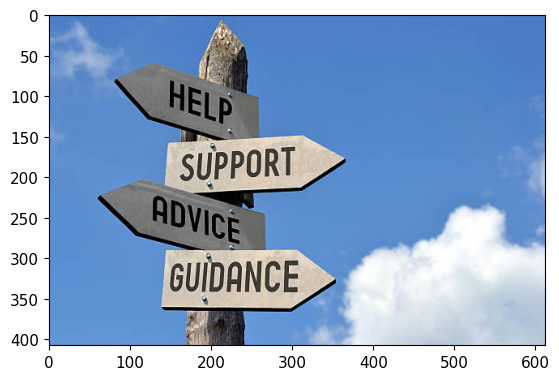

In [23]:
# Preprocess image

img1 = rotate.rotate(img_rgb)
plt.imshow(img1)
plt.show()

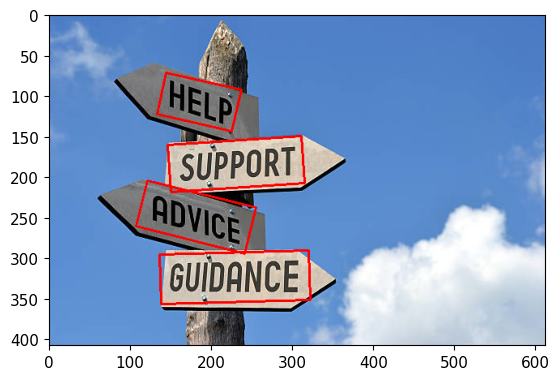

In [24]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [26]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

HELP
SUPPORT
ADVICE
GUIDANCE


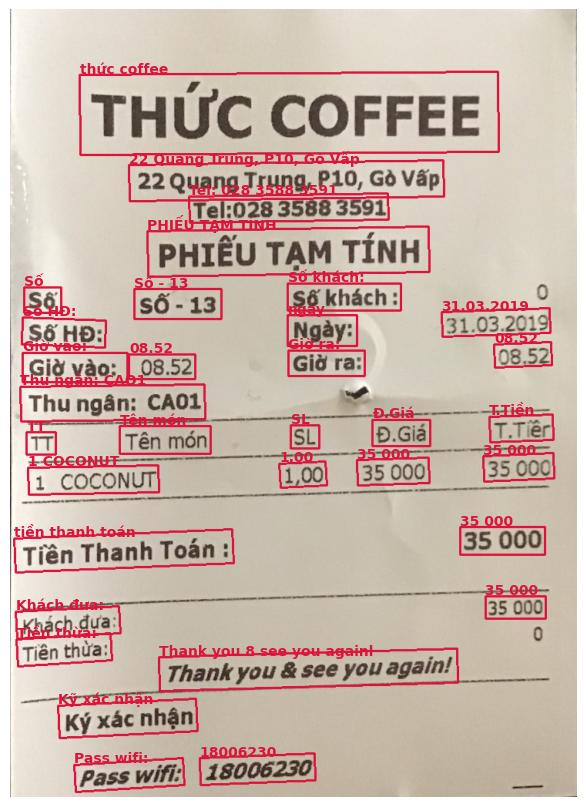

In [20]:
preds, probs = None, None
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=None,
    labels = preds, probs = probs,
    visualize_best=False)


from IPython.display import Image
from IPython.display import display

img = Image(f"/content/main/results/{img_id}/result.jpg", width=600)
display(img)

In [ ]:
preds, probs = None, None
start = time.time()
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=None,
    labels = preds, probs = probs,
    visualize_best=False)

end = time.time()
print(f"Executed in {end-start} s")

Executed in 0.61415696144104 s


In [ ]:
!rm -rf ".cache"